In [ ]:
#Importing the necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import sys

#Defining a Nueron
def Nueron(input_value,activation_function,weight_vector,bias):
    output=(np.dot(input_value,weight_vector)+bias)
    if(activation_function=='ReLu'):
        if(input_value<=0):
            activated_output=0
            return activated_output
        else:
            activated_output=input_value
            return activated_output
    elif(activation_function=='Sigmoid'):
        activated_output=output=1/(1+math.exp(-output))
        return activated_output
    elif(activation_function=='Regression'):
        return output

def update_weight(w,lr,t,o,i,b):
  for j in range(input_features):
    w[j]=(w[j]-(lr*2*np.mean((t-o)*(-i[:,j]))))
  b=(b-(lr*2*np.mean((t-o)*(-1))))
  return w,b

#Importing the dataset of a simple linear regression problem from sklearn
from sklearn import datasets, linear_model
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train= diabetes_X[:422, np.newaxis, ]
diabetes_y=((diabetes_y-min(diabetes_y))/(max(diabetes_y)-min(diabetes_y)))
diabetes_X_test= diabetes_X[422:,]
diabetes_y_test=diabetes_y[422:,]
activation_function='Regression'
input_features=diabetes_X.shape[1]
number_of_samples=diabetes_X.shape[0]
weight_vector=np.zeros(input_features)

In [ ]:
#Training the Model
number_of_samples=diabetes_X_train.shape[0]
batch_size=20
number_of_batches=int(number_of_samples/batch_size)
epochs=200
loss_values=[]
for k in range(epochs):
  #print('#################')
  for i in range(number_of_batches):
    input=diabetes_X_train[i*batch_size:(i+1)*batch_size,0]
    target=diabetes_y[i*batch_size:(i+1)*batch_size]
    output=Nueron(input,activation_function,weight_vector,bias)
    loss_function=np.mean((target-output)*(target-output))
    loss_values.append(loss_function)
    #print(loss_function,weight_vector)
    #sys.exit(0)
    learning_rate=0.7
    weight_vector,bias=update_weight(weight_vector,learning_rate,target,output,input,bias)

In [ ]:
#Evaluating the model
weight_vector=weight_vector.reshape(-1,1)
prediction=(np.matmul(diabetes_X_test,weight_vector)+bias)
print(prediction)

[[0.52994579]
 [0.3999929 ]
 [0.4569246 ]
 [0.25298369]
 [0.4486307 ]
 [0.34177055]
 [0.75043408]
 [0.23544263]
 [0.28742192]
 [0.31332553]
 [0.61310147]
 [0.1198138 ]
 [0.35393499]
 [0.30296031]
 [0.09196156]
 [0.52907389]
 [0.25665332]
 [0.32913771]
 [0.56759077]
 [0.07044063]]


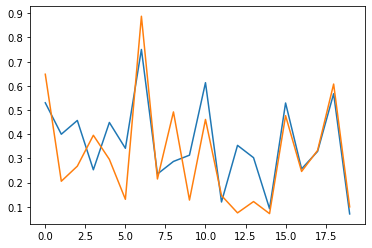

In [ ]:
import matplotlib.pyplot as plt
plt.plot(prediction)
plt.plot(diabetes_y_test)